# Zadanie

Zadanie polega na przeprowadzniu interpolacji dwóch funkcji
$$f_1(x)=\frac{1}{1+25x^2},x\in[-1,1]$$
$$f_2(x)=\exp(\cos(x)),x\in[0,2\pi]$$
trzema sposobami:

- Za pomocą wielomianów Lagrange'a z $n$ węzłami równomiernie rozłozonymi.
- Za pomocą wielomianów Lagrange'a z $n$ węzłami Czebyszewa wyliczonymi ze wzoru $x_j=\cos\left(\frac{(2j-1)\pi}{2n}\right),j=1,2,...,n$ ^[1]^
- Metodą sklejanych funkcji kubicznych (*cubic splines*)

Następnie należy dla każdej funkcji przeprowadzić interpolacje dla $n=4,5,...,50$ oraz przedstawić wykresy norm wektorów błędów w zależności od $n$.

# Biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

Wykorzystane biblioteki:

- `numpy` używana do przeprowadzania obliczeń oraz do implementacji funkcji.
- `matplotlib.pyplot` wykorzystana do rysowania wykresów
- Klasa `CubicSpline` z biblioteki `scipy.interpolate` służy jako implementacja interpolacji metodą *cubic splines*

# Funkcje ogólne

In [2]:
def f1(x):
    return 1/(1+25*(x**2))

def f2(x):
    return np.exp(np.cos(x))

def chebyshew_node(j, n):
    return np.cos(((2*j-1)*np.pi)/(2*n))

def transform_chebyshew(r, a, b):
    return a + (b - a) * (r + 1)/2 

- `f1` - implementacja funkcji Rungego ($f_1$)
- `f2` - implementacja funkcji $f_2$
- `chebyshew_node` - implementacja służąca do wyliczenia węzłów Czebyszewa na przedziale $[-1,1]$
- `transform_chebyshew` - funkcja transformująca węzły Czebyszewa z przedziału $[-1,1]$ na dowolny przedział $[a,b]$

In [3]:
def l(j, t, points):    
    numerator = 1
    denominator = 1
    for k in range(len(points)):
        if j != k:
            numerator *= t - points[k]
            denominator *= points[j] - points[k]
    return numerator/denominator

def p_lagrange(t, y, x):
    res = 0
    for j in range(len(y)):
        res += y[j] * l(j, t, x)
    return res

Funkcje `l` i `p_lagrange` implementują interpolację z wykorzystaniem wielomianów Lagrange'a

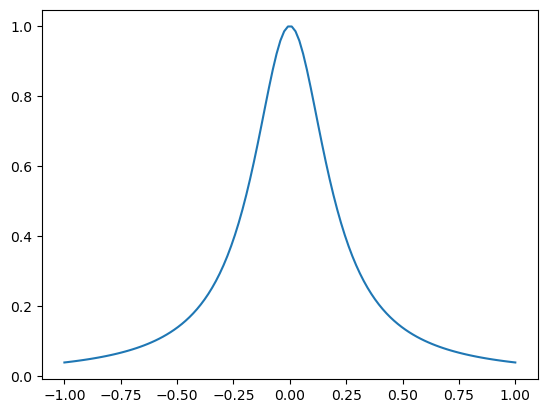

In [4]:
xs = np.linspace(start=-1, stop=1, num=120)
ys = f1(xs)

plt.plot(xs, ys)
plt.show()

**Wyk. 1** - wykres przedstawia funkcję Rungego ($f_1$)

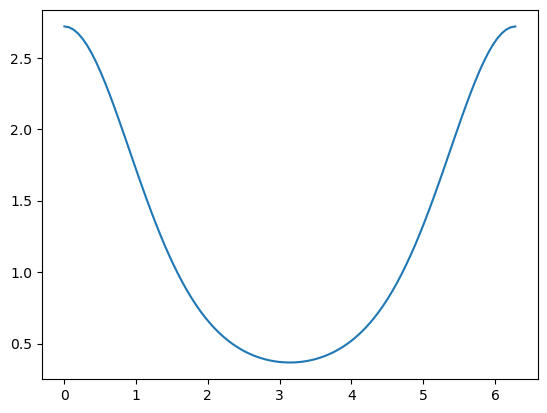

In [5]:
xs = np.linspace(start=0, stop=(2*np.pi), num=100)
ys = f2(xs)

plt.plot(xs, ys)
plt.show()

**Wyk. 2** - wykres przedstawia funkcję $f_2$

# Interpolacja funkcji Rungego dla $n=12$

In [6]:
n = 12

In [7]:
xs = np.linspace(start=-1, stop=1, num=10*n)
ys = f1(xs)

`xs` to zbiór 120 punktków służących do ewaluacji wielomianów interpolacyjnych  
`ys` to wartości funkcji $f_1$ dla zbioru `xs` 

## Interpolacja Lagrange'a z węzłami równomiernie rozłożonymi

In [8]:
nodes_unif = np.linspace(start=-1, stop=1, num=n)
polynomial_unif = f1(nodes_unif)

$n=12$ węzłów rozłożonych równomiernie oraz wartości funkcji $f_1$ dla tych węzłów

In [9]:
# xs remain the same
ys_unif = [p_lagrange(xs[i], polynomial_unif, nodes_unif) for i in range(10*n)]

Wartości wielomianu Lagrange'a dla punktków ze zbioru `xs`, wyliczonych za pomocą funkcji `l` oraz `p_lagrange`

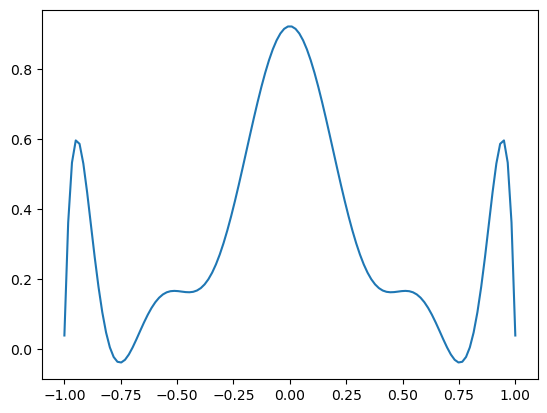

In [10]:
plt.plot(xs, ys_unif)
plt.show()

**Wyk. 3** - Wykres wielomianu interpolacyjnego Lagrange'a z węzłami równomiernie rozłożonymi dla funkcji $f_1$ 

## Interpolacja Lagrange'a z węzłami Czebyszewa

In [11]:
nodes_chebyshew = np.array([chebyshew_node(j, n) for j in range(1, n+1)])
polynomial_chebyshew = f1(nodes_chebyshew)

$n=12$ węzłów Czebyszewa oraz ich wartości funkcji $f_1$ tych węzłów

In [12]:
# xs stay the same
ys_chebyshew = [p_lagrange(xs[i], polynomial_chebyshew, nodes_chebyshew) for i in range(10*n)]

Wartości wielomianu Lagrange'a dla punktków ze zbioru `xs`, wyliczonych za pomocą funkcji `l` oraz `p_lagrange`

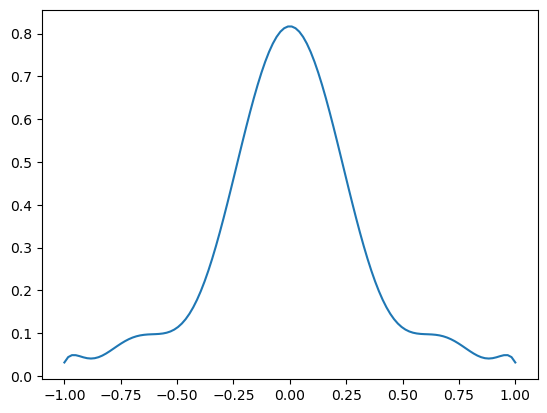

In [13]:
plt.plot(xs, ys_chebyshew)
plt.show()

**Wyk. 4** - Wielomian interpolacyjny Lagrange'a z węzłami Czebyszewa dla funkcji $f_1$

## Interpolacja metodą *cubic spline* z węzłami rozłożonymi równomiernie

In [14]:
nodes_spline = np.linspace(start=-1, stop=1, num=n)
polynomial_spline = f1(nodes_spline)

In [15]:
spl = CubicSpline(nodes_spline, polynomial_spline)

`spl` to funkcja zwracająca wartości sklejanego wielomianu na podstawie równomiernie rozłożonych węzłów i ich wartości. Interpolacja przeprowadzona za pomocą klasy `CubicSpline`

In [16]:
# xs remain the same
ys_spline = [spl(xs[i]) for i in range(10*n)]

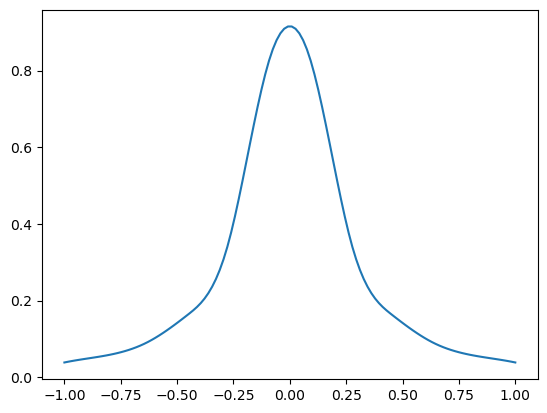

In [17]:
plt.plot(xs, ys_spline)
plt.show()

**Wyk. 5** - Wielomian interpolacyjny uzyskany dzięki metodzie *cubic splines* dla funkcji $f_1$

## Wspólny wykres

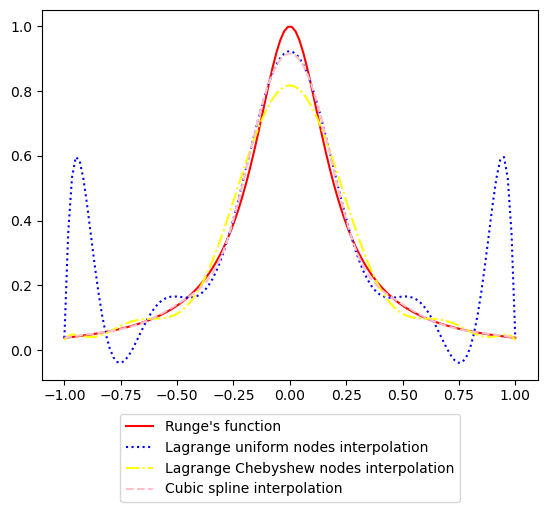

In [18]:
plt.plot(xs, ys, color="red", label="Runge's function")
plt.plot(xs, ys_unif, color="blue", linestyle=":", label="Lagrange uniform nodes interpolation")
plt.plot(xs, ys_chebyshew, linestyle="-.", color="yellow", label="Lagrange Chebyshew nodes interpolation")
plt.plot(xs, ys_spline, linestyle="--", color="pink", label="Cubic spline interpolation")
plt.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center')
plt.show()

**Wyk. 6** - wspólny wykres dla funkcji $f_1$ oraz jej wielomianów interpolacyjnych uzyskanych różnymi metodami

# Interpolacja funkcji 2 dla $n=12$

Wszystkie kroki oraz metody działania są analogiczne do funkcji $f_1$

In [19]:
n = 12

In [20]:
xs = np.linspace(start=0, stop=2*np.pi, num=10*n)
ys = f2(xs)

## Interpolacja Lagrange'a z węzłami równomiernie rozłożonymi

In [21]:
nodes_unif = np.linspace(start=0, stop=2*np.pi, num=n)
polynomial_unif = f2(nodes_unif)

In [22]:
# xs remain the same
ys_unif = [p_lagrange(xs[i], polynomial_unif, nodes_unif) for i in range(10*n)]

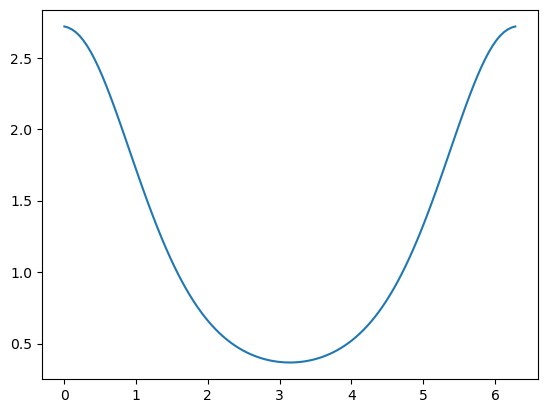

In [23]:
plt.plot(xs, ys_unif)
plt.show()

**Wyk. 7** - wielomian interpolacyjny Lagrange'a z węzłami równomiernie rozłożonymi dla $f_2$

## Interpolacja Lagrange'a z węzłami Czebyszewa

In [24]:
r = [chebyshew_node(j, n) for j in range(1, n+1)]
nodes_chebyshew = np.array([transform_chebyshew(r[i], 0, 2*np.pi) for i in range(n)])
polynomial_chebyshew = f2(nodes_chebyshew)

`r` to węzły Czebyszewa dla przedziału $[-1,1]$. Aby można było z nich skorzystać trzeba przeliczyć je na przedział $[0,2\pi]$ za pomocą wzoru $x=a+(b-a)\cdot(r+1)/2$.  
Wzór ten implementowany jest przez funkcję `transform_chebyshew`

In [25]:
# xs stay the same
ys_chebyshew = [p_lagrange(xs[i], polynomial_chebyshew, nodes_chebyshew) for i in range(10*n)]

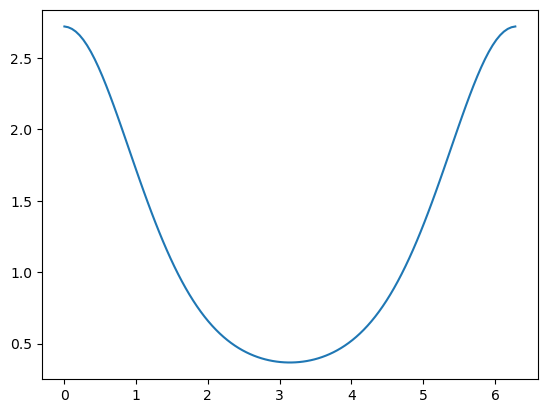

In [26]:
plt.plot(xs, ys_chebyshew)
plt.show()

**Wyk. 8** - wielomian interpolacyjny Lagrange'a z węzłami Czebyszewa dla $f_2$

## Interpolacja metodą *cubic spline* z węzłami rozłożonymi równomiernie

In [27]:
nodes_spline = np.linspace(start=0, stop=2*np.pi, num=n)
polynomial_spline = f2(nodes_spline)

In [28]:
spl = CubicSpline(nodes_spline, polynomial_spline)

In [29]:
# xs remain the same
ys_spline = [spl(xs[i]) for i in range(10*n)]

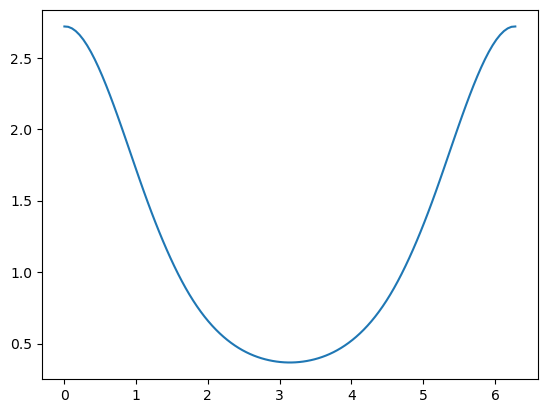

In [30]:
plt.plot(xs, ys_spline)
plt.show()

**Wyk. 9** - wielomian interpolacyjny uzyskany metodą *cubic splines* dla $f_2$

## Wspólny wykres

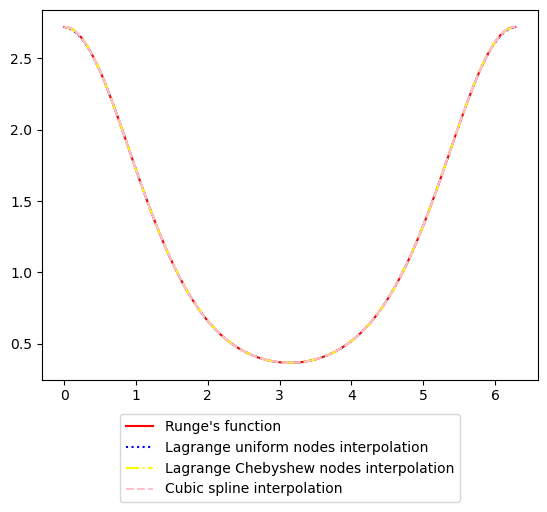

In [31]:
plt.plot(xs, ys, color="red", label="Runge's function")
plt.plot(xs, ys_unif, color="blue", linestyle=":", label="Lagrange uniform nodes interpolation")
plt.plot(xs, ys_chebyshew, linestyle="-.", color="yellow", label="Lagrange Chebyshew nodes interpolation")
plt.plot(xs, ys_spline, linestyle="--", color="pink", label="Cubic spline interpolation")
plt.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center')
plt.show()

**Wyk. 10** - wspólny wykres dla trzech metod interpolacji dla funkcji $f_2$

# Interpolacja funkcji Rungego dla $n=4,5,...,50$

Metody interpolacji oraz implementacje są takie same jak dotychczas, dodatkowo dla każdego z 500 losowych punktów testowych, dla każdego $n$ wyliczany jest błąd bezwzględny między wartością funkcji, a wartością wielomianiu interpolacyjnego. Wartości te są traktowane jako wektor, z którego wyliczana jest norma.

## Dodatkowe biblioteki

In [32]:
from random import uniform

funkcja `uniform` z biblioteki `random` pozwala wygenerować losowe liczby rzeczywiste z zadanego przedziału

In [33]:
xs_func = np.array([uniform(-1, 1) for _ in range(500)])
ys_func = f1(xs_func)

`xs_func` to zbiór 500 losowych punktów z przedziału $[-1,1]$, `ys_func` to wartości funkcji $f_1$ dla tych punktów 

## Interpolacja Lagrange'a z węzłami równomiernie rozłożonymi

In [34]:
error_norm_lagrange = []

In [35]:
for n in range(4, 51):
    nodes = np.linspace(start=-1, stop=1, num=n)
    polynomial = f1(nodes)
    ys = np.array([p_lagrange(xs_func[i], polynomial, nodes) for i in range(500)])
    errors = abs(ys_func - ys)
    error_norm_lagrange.append(np.linalg.norm(errors))

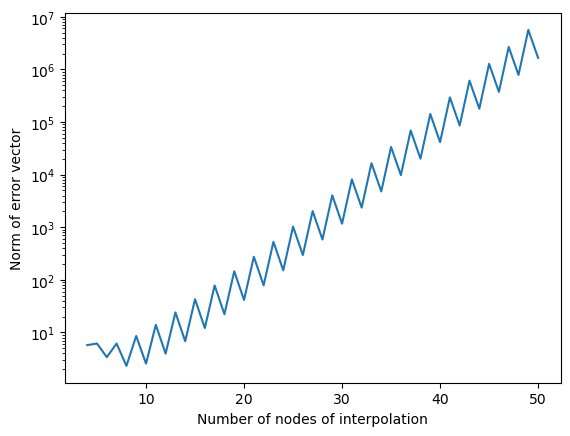

In [36]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_lagrange)
plt.show()

**Wyk. 11** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_1$ i wielomianu Lagrange'a z węzłami równomiernie rozłożonymi.

## Interpolacja Lagrange'a z węzłami Czebyszewa

In [37]:
error_norm_chebyshew = []

In [38]:
for n in range(4, 51):
    nodes = np.array([chebyshew_node(j, n) for j in range(1, n+1)])
    polynomial = f1(nodes)
    ys = np.array([p_lagrange(xs_func[i], polynomial, nodes) for i in range(500)])
    errors = abs(ys_func - ys)
    error_norm_chebyshew.append(np.linalg.norm(errors))

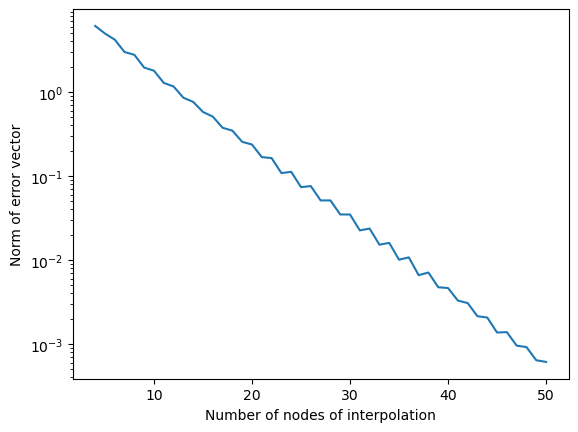

In [39]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_chebyshew)
plt.show()

**Wyk. 12** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_1$ i wielomianu Lagrange'a z węzłami Czebyszewa.

## Interpolacja metodą *cubic spline*

In [40]:
error_norm_spline = []

In [41]:
for n in range(4, 51):
    nodes = np.linspace(start=-1, stop=1, num=n)
    polynomial = f1(nodes)
    spl = CubicSpline(nodes, polynomial)
    ys = np.array([spl(xs_func[i]) for i in range(500)])
    errors = abs(ys - ys_func)
    error_norm_spline.append(np.linalg.norm(errors))

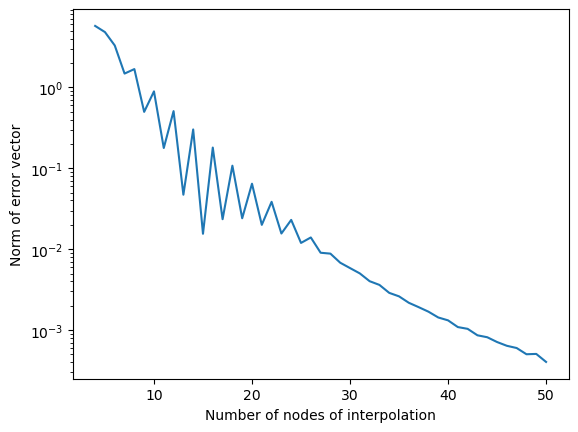

In [42]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_spline)
plt.show()

**Wyk. 13** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_1$ i metody *cubic spline*.

## Wspólny wykres

In [43]:
ns = list(range(4, 51))

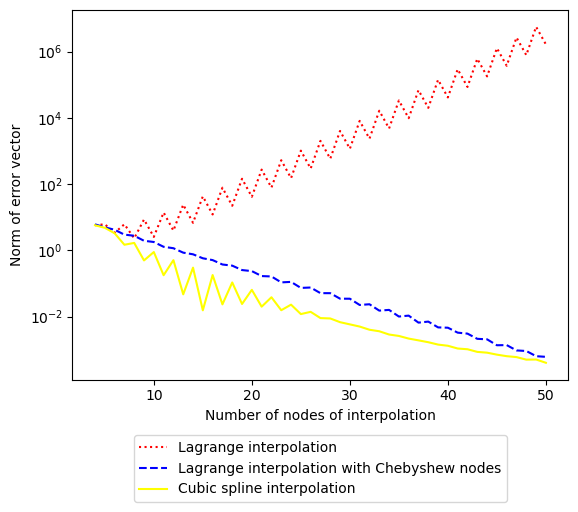

In [44]:
plt.plot(ns, error_norm_lagrange, linestyle=":", color="red", label="Lagrange interpolation")
plt.plot(ns, error_norm_chebyshew, linestyle="--", color="blue", label="Lagrange interpolation with Chebyshew nodes")
plt.plot(ns, error_norm_spline, linestyle="solid", color="yellow", label="Cubic spline interpolation")
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center')
plt.show()

**Wyk. 14** - wykres wspólny norm wektorów błędów dla trzech różnych metod interpolacji $f_1$

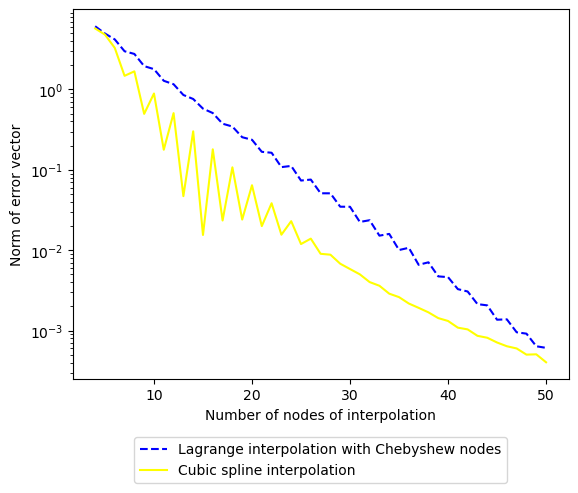

In [45]:
plt.plot(ns, error_norm_chebyshew, linestyle="--", color="blue", label="Lagrange interpolation with Chebyshew nodes")
plt.plot(ns, error_norm_spline, linestyle="solid", color="yellow", label="Cubic spline interpolation")
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center')
plt.show()

**Wyk. 15** - wykres norm wektorów błędów dla funkcji $f_1$ metod *cubic splines* oraz interpolacji Lagrange'a z węzłami Czebyszewa

# Interpolacja funkcji 2 dla $n=4,5,...,50$

In [46]:
xs_func = np.array([uniform(0, 2*np.pi) for _ in range(500)])
ys_func = f2(xs_func)

## Interpolacja Lagrange'a z węzłami równomiernie rozłożonymi

In [47]:
error_norm_lagrange = []

In [48]:
for n in range(4, 51):
    nodes = np.linspace(start=0, stop=2*np.pi, num=n)
    polynomial = f2(nodes)
    ys = np.array([p_lagrange(xs_func[i], polynomial, nodes) for i in range(500)])
    errors = abs(ys_func - ys)
    error_norm_lagrange.append(np.linalg.norm(errors))

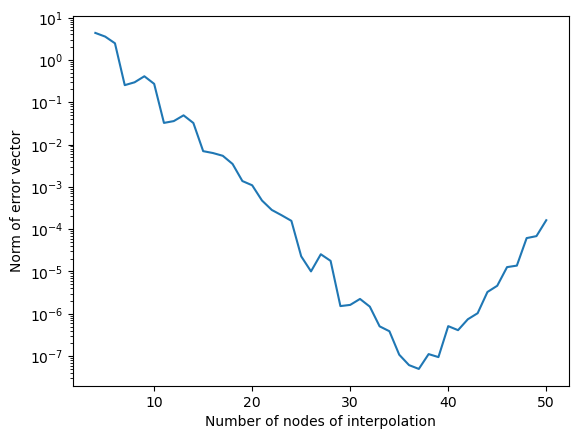

In [49]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_lagrange)
plt.show()

**Wyk. 16** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_2$ i wielomianu Lagrange'a z węzłami równomiernie rozłożonymi.

## Interpolacja Lagrange'a z węzłami Czebyszewa

In [50]:
error_norm_chebyshew = []

In [51]:
for n in range(4, 51):
    r = [chebyshew_node(j, n) for j in range(1, n+1)]
    nodes = np.array([transform_chebyshew(r[i], 0, 2*np.pi) for i in range(n)])
    polynomial = f2(nodes)
    ys = np.array([p_lagrange(xs_func[i], polynomial, nodes) for i in range(500)])
    errors = abs(ys_func - ys)
    error_norm_chebyshew.append(np.linalg.norm(errors))

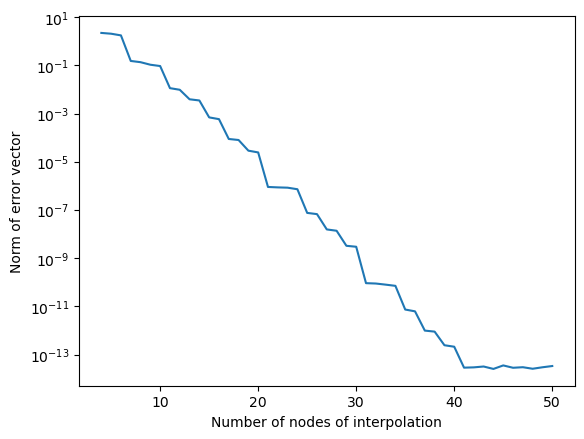

In [52]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_chebyshew)
plt.show()

**Wyk. 17** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_2$ i wielomianu Lagrange'a z węzłami Czebyszewa.

## Interpolacja metodą *cubic spline*

In [53]:
error_norm_spline = []

In [54]:
for n in range(4, 51):
    nodes = np.linspace(start=0, stop=2*np.pi, num=n)
    polynomial = f2(nodes)
    spl = CubicSpline(nodes, polynomial)
    ys = np.array([spl(xs_func[i]) for i in range(500)])
    errors = abs(ys - ys_func)
    error_norm_spline.append(np.linalg.norm(errors))

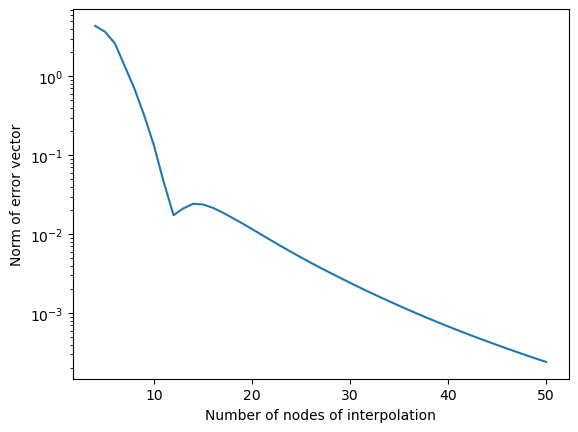

In [55]:
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.plot(range(4, 51), error_norm_spline)
plt.show()

**Wyk. 18** - Wykres norm wektorów błędów w zależności od ilości węzłów interpolacji, dla funkcji $f_2$ i metody *cubic splines*.

## Wspólny wykres

In [56]:
ns = list(range(4, 51))

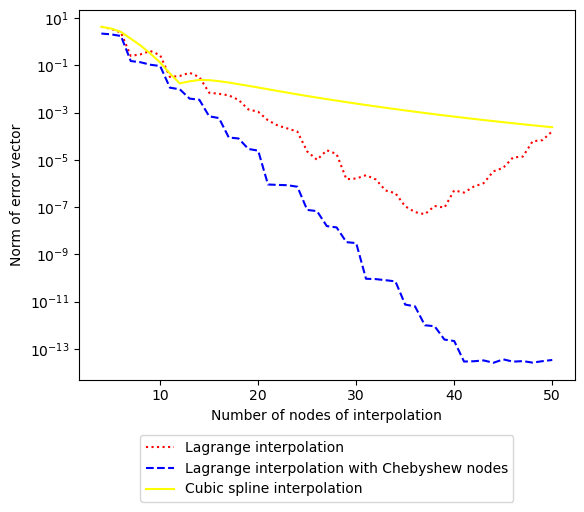

In [57]:
plt.plot(ns, error_norm_lagrange, linestyle=":", color="red", label="Lagrange interpolation")
plt.plot(ns, error_norm_chebyshew, linestyle="--", color="blue", label="Lagrange interpolation with Chebyshew nodes")
plt.plot(ns, error_norm_spline, linestyle="solid", color="yellow", label="Cubic spline interpolation")
plt.xlabel("Number of nodes of interpolation")
plt.ylabel("Norm of error vector")
plt.yscale("log")
plt.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center')
plt.show()

**Wyk. 19** - wykres wspólny norm wektorów błędów dla trzech różnych metod interpolacji $f_2$

# Wnioski

## $n=12$

- Dla funkcji $f_1$ oraz $n=12$ najefektywniejszą metodą interpolacji jest metoda *cubic splines*. Wartości uzyskane za pomocą tego wielomianiu są najbardziej zbliżone do wartości funkcji.
- Metoda Lagrange'a jest znacznie dokładniejsza jeśli użyte są węzły Czebyszewa, zamiast węzłów równomiernie rozłożonych (dla $f_1$).
- W przypadku funkcji $f_2$ wszystkie trzy metody z dużą dokładnością przybliżyły funkcję na zadanej dziedzinie.

## $n=4,5,...,50$

- Dla funkcji $f_1$ norma wektora błędów bardzo szybko rośnie wraz ze zwiększaniem się ilości punktów interpolacji w przypadku interpolacji Lagrange'a z punktami równoodległymi.
- Dla pozostałych dwóch metod norma maleje wraz ze zwiększaniem się ilości punktów interpolacji.
- Dla funkcji $f_2$ norma wektora błędów maleje wraz ze wzrostem punktów interpolacji dla każdej z metod.
- Dla funkcji $f_2$ najlepszą metodą interpolacji jest metoda baz Lagrange'a z węzłami Czebyszewa.

# Przypisy

- [1] *https://heath.cs.illinois.edu/scicomp/notes/cs450_chapt07.pdf*